# Neccesary Libraries

In [87]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pylab as py
from scipy.stats import norm

In [57]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Data Understanding

In [58]:
salary_data.shape

(30, 2)

In [59]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [60]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [61]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [62]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

# Assumption Check

## Linearity test

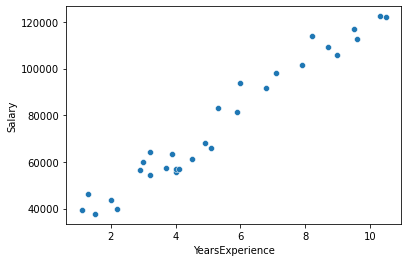

In [63]:
sns.scatterplot(x ='YearsExperience',y = 'Salary',data = salary_data);

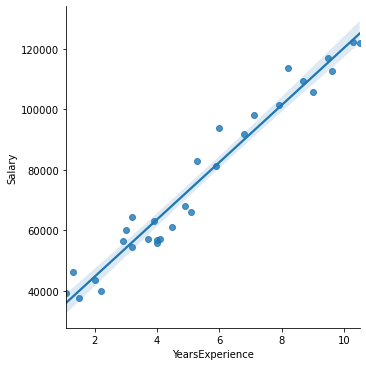

In [64]:
sns.lmplot(x ='YearsExperience',y = 'Salary',data = salary_data);

#### Linearity test failed

## Normality Test

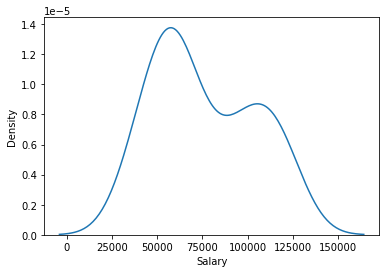

In [65]:
sns.distplot(a=salary_data['Salary'],hist=False);

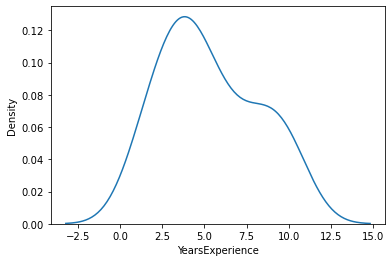

In [66]:
sns.distplot(a=salary_data['YearsExperience'],hist=False);

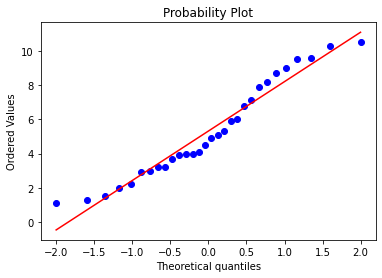

In [69]:
stats.probplot(x=salary_data['YearsExperience'],plot=plt);

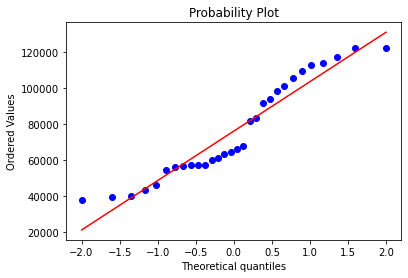

In [70]:
stats.probplot(x=salary_data['Salary'],plot=plt);

In [86]:
salary_data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [38]:
salary_data.kurtosis()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

#### Normality test failed

# Multi collinearity

***we cannot perform we have only one input***

# Auto Regression

**we cannot perform here as we are having only one input feature and that is also not time  based feature**

## Model Building || Model training using stats Model

In [41]:
salary_data_df = pd.DataFrame(salary_data)
salary_data_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [50]:
salary_data_df.rename(columns={'YearsExperience' :'Exp','Salary':'salary'},inplace=True)

In [51]:
linear_model = smf.ols(formula ='Exp~salary',data=salary_data_df).fit()
linear_model


In [52]:
linear_model.params

Intercept   -2.383161
salary       0.000101
dtype: float64

In [54]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Exp   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        00:14:32   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Deployment

In [90]:
from pickle import dump

In [95]:
dump(linear_model,open('model1.pkl','wb'))

In [96]:
from pickle import load

In [97]:
loaded_model = load(open('model1.pkl','rb'))